# HW1

# Task 1 – Curse of dimensionality and effect of sample size

a) Calculating the fractions and plotting fractions as a function of D

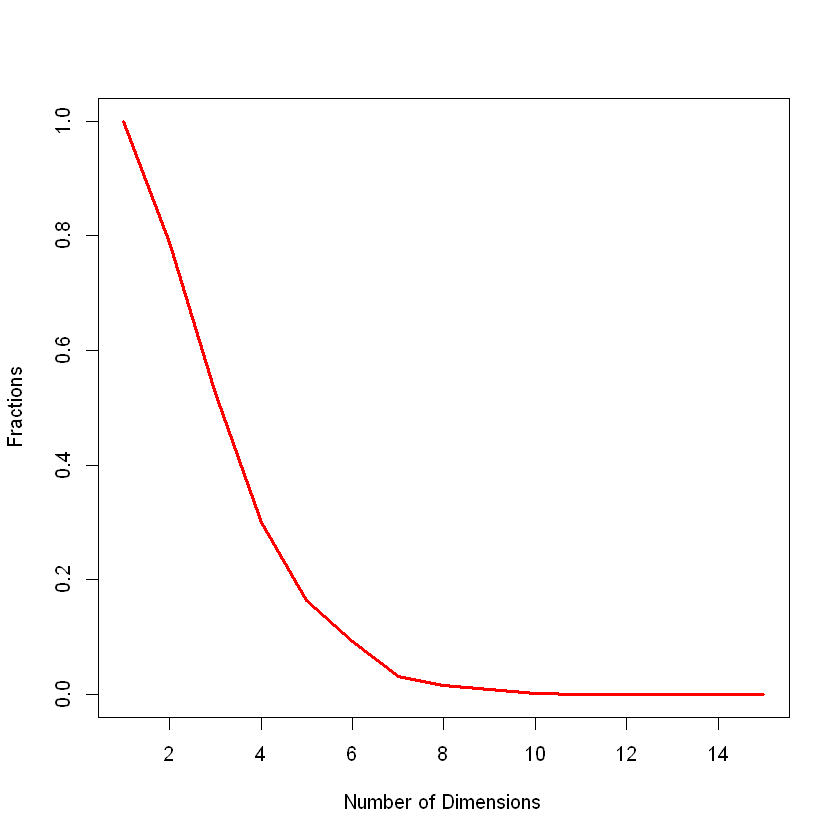

In [2]:
#initalizing 
#set.seed(123)
number_of_points <- 1000
number_of_within_area <- 0
number_of_dimension <- 15
number_of_dimensions <- 1:number_of_dimension
fractions <- c()
#funtion for calculating euclidian distance
euclidean <- function(x, y) sqrt(sum((x - y)^2))

#Calculating fractions
for(i in 1:number_of_dimension){
    for(j in 1:number_of_points){
        coordinate <- runif(n=i,min=-1,max=1)
        origin = rep(0,i)        
        distance = euclidean(coordinate,origin)
        if(distance <= 1){
            number_of_within_area <- number_of_within_area + 1
        }
    }
    fraction <- number_of_within_area / number_of_points
    fractions <- append(fractions,fraction)
    number_of_within_area <- 0
}

#plot graph
plot(number_of_dimensions,fractions,type="l",lty=1, lwd=3,col = "red",xlab="Number of Dimensions", ylab="Fractions")

b) Estimatation for the value of pi (Π)

In [3]:
#for 2-D
pi_2D = 4*fractions[2]
#for 3-D
pi_3D = 6*fractions[3]

#outputs
print(paste("pi value: ",pi))
print(paste("estimated pi value for 2 dimension: ",pi_2D))
print(paste("estimated pi value for 3 dimension: ",pi_3D))

[1] "pi value:  3.14159265358979"
[1] "estimated pi value for 2 dimension:  3.152"
[1] "estimated pi value for 3 dimension:  3.156"


c) Visualizing the estimated Π for 2 and 3 dimension with large samples

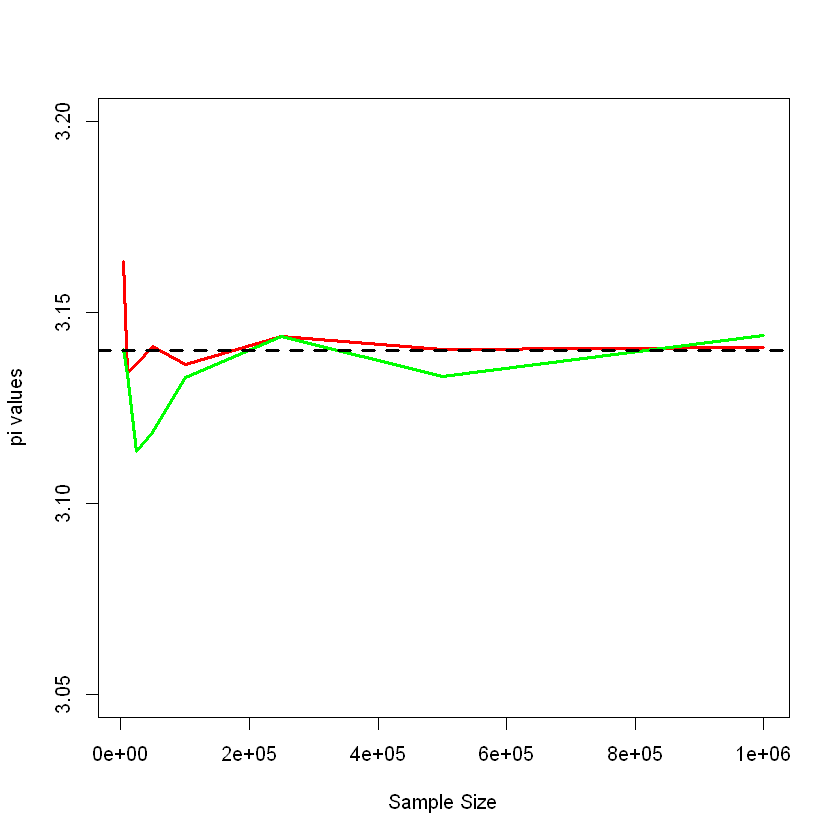

In [4]:
#initalizing 
number_of_points <- c(5000,10000,25000,50000,100000,250000,500000,1000000)
number_of_within_area2 <- 0    #for 2-D
number_of_within_area3 <- 0    #for 3-D
pi_2D <- c()                   #for 2-D
pi_3D <- c()                   #for 3-D

for (k in number_of_points){
    for(j in 1:k){
        coordinate2 <- runif(n=2,min=-1,max=1)
        coordinate3 <- runif(n=3,min=-1,max=1)
        origin2 = rep(0,2)
        origin3 = rep(0,3)
        distance2 = euclidean(coordinate2,origin2)
        distance3 = euclidean(coordinate3,origin3)
        if(distance2 <= 1){
            number_of_within_area2 <- number_of_within_area2 + 1
        }
        if(distance3 <= 1){
            number_of_within_area3 <- number_of_within_area3 + 1
        }
    }
    #Calculating fractions
    fraction2 <- number_of_within_area2 / k
    fraction3 <- number_of_within_area3 / k
    #Estimatation for the value of pi
    pi_2 = 4*fraction2
    pi_3 = 6*fraction3
    pi_2D = append(pi_2D,pi_2)
    pi_3D = append(pi_3D,pi_3)
    number_of_within_area2 <- 0   
    number_of_within_area3 <- 0 
}

#plot graph
plot(x=number_of_points, y=pi_2D, type="l", lty=1,lwd=3, ylim=c(3.05,3.20), col = "red", xlab="Sample Size", ylab="pi values")
lines(x=number_of_points, y=pi_3D,type="l",lty=1, lwd=3, col="green")
abline(h=3.14,  lty=2, lwd=3, col="black")


#We can see that as the sample size increase, we can estimate pi value much better, but otherwise, as the dimension number
#increase we see that the estimated pi values deviates more from the actual pi value line.

d) Plotting the average distance from the test instances to their nearest neighbors as a function of D

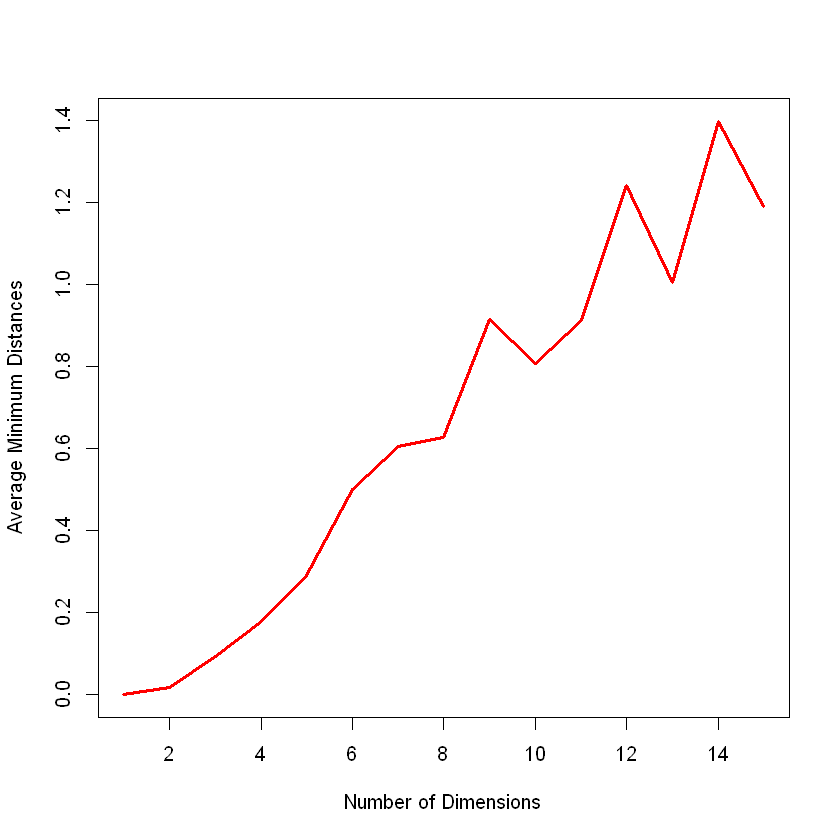

In [5]:
#initalizing 
additional_instances <- 100
number_of_dimension <- 15
min_distances <- c()
averages <- c()

#Calculating average minimum distances
for(i in 1:number_of_dimension){
    
    coordinates <- matrix(0,i,additional_instances)
    for(j in 1:i){
        coordinates[j,] = runif(n=additional_instances,min=-1,max=1)            
    }
    distances <- c()
    avg_min <-c()
    min <- 10000000
    for(m in 1:additional_instances){
        for(n in 1:additional_instances){
            if(m != n){
                distance = euclidean(coordinates[,m],coordinates[,n])
                                
                if(distance <= min){
                    min = distance
                    }      
            }
        }
        avg_min = append(avg_min, min)
    }
    average = mean(avg_min)
    averages = append(averages,average)

}

#Plot graph
plot(x=1:number_of_dimension, y=averages, type="l", lty=1,lwd=3, col = "red", xlab="Number of Dimensions", ylab="Average Minimum Distances")

# Task 2 – Practicing data manipulation skills on images

a) Reading image

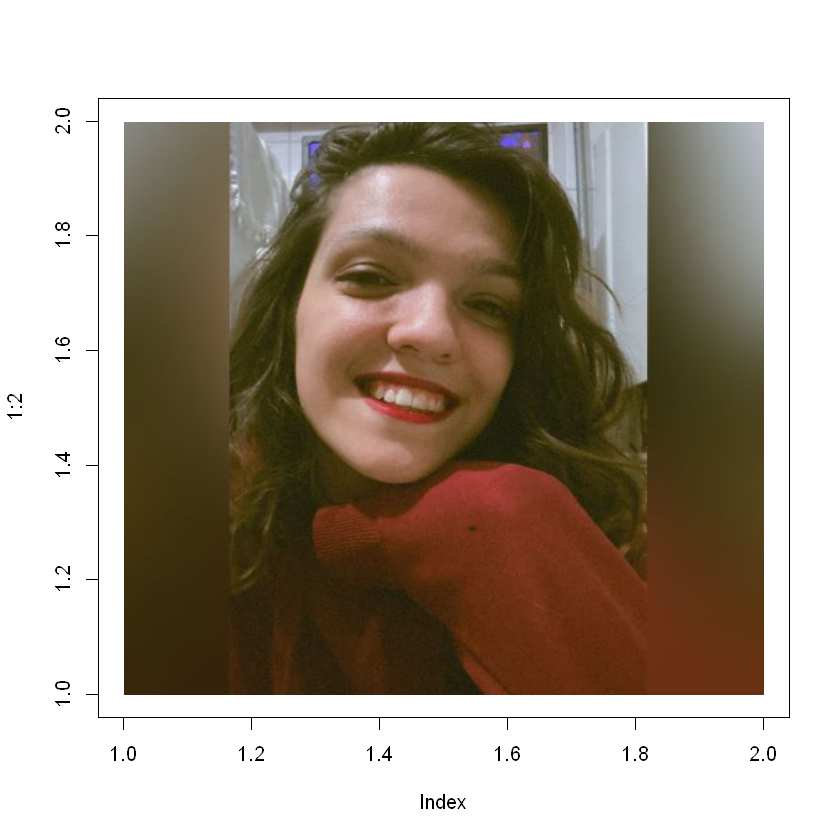

In [9]:
# if needed <<<   install.packages("jpeg")
#read image
library(jpeg)
img <- readJPEG("582.jpeg")
if(exists("rasterImage")){
      plot(1:2, type='n')
      rasterImage(img,1,1,2,2)
}

b) Displaying Channels

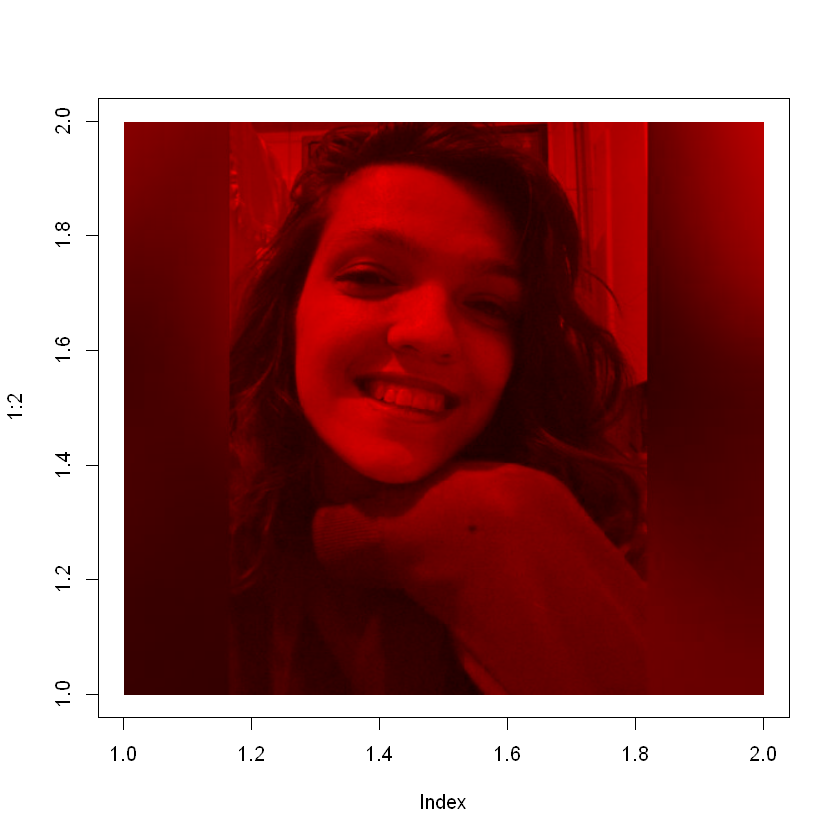

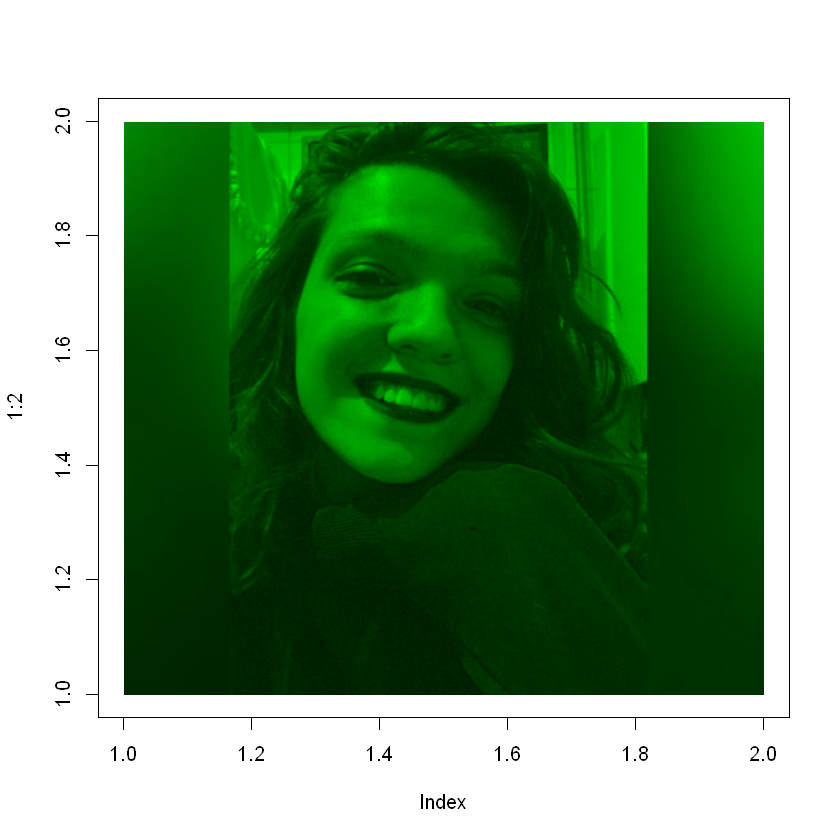

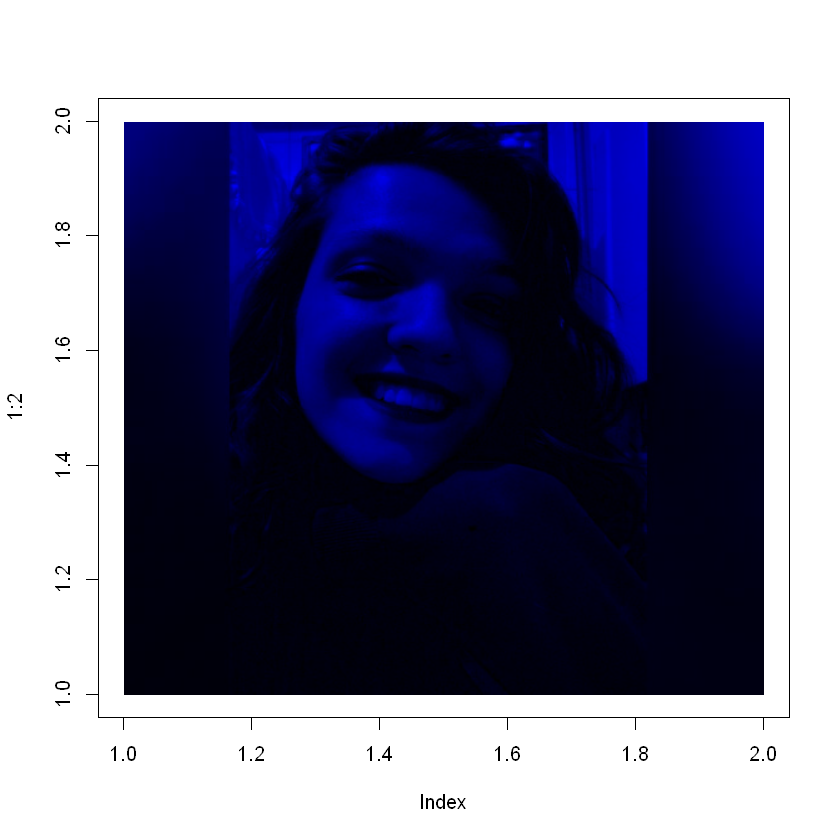

In [10]:
#rgb channels
#red 
red <- readJPEG("582.jpeg")
for(i in 1:512){
    for (j in 1:512){
        red[i,j,2] = 0
        red[i,j,3] = 0
    }
}
if(exists("rasterImage")){
      plot(1:2, type='n')
      rasterImage(red,1,1,2,2)
}

#green
green <- readJPEG("582.jpeg")
for(i in 1:512){
    for (j in 1:512){
        green[i,j,1] = 0
        green[i,j,3] = 0
    }
}
if(exists("rasterImage")){
      plot(1:2, type='n')
      rasterImage(green,1,1,2,2)
}
#blue
blue <- readJPEG("582.jpeg")
for(i in 1:512){
    for (j in 1:512){
        blue[i,j,1] = 0
        blue[i,j,2] = 0
    }
}
if(exists("rasterImage")){
      plot(1:2, type='n')
      rasterImage(blue,1,1,2,2)
}

c) Plot for average of the columns

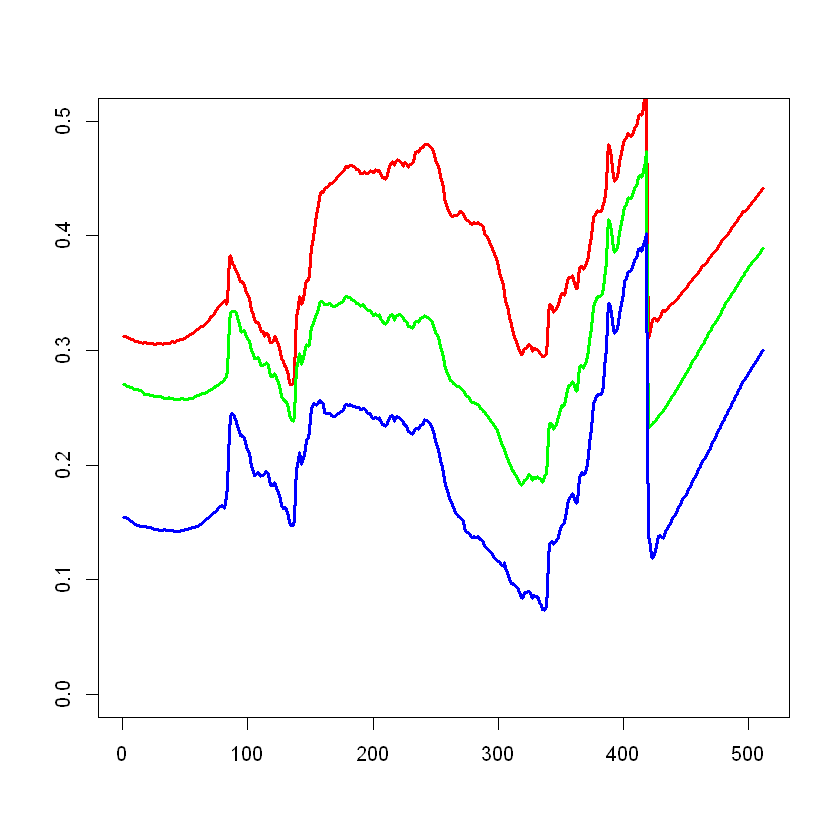

In [11]:
#initializing
avg_red <-c()
avg_green <- c()
avg_blue <- c()

#columns avarages
for(i in 1:512){
    avg = mean(red[,i,1])
    avg_red = append(avg_red,avg)
    avg = mean(green[,i,2])
    avg_green = append(avg_green,avg)
    avg = mean(blue[,i,3])
    avg_blue = append(avg_blue,avg)    
    
}

#plot the graph
plot(x=1:512, y=avg_red, type="l", lty=1,lwd=3, ylim=c(0,0.5),col = "red", xlab="", ylab="")
lines(x=1:512, y=avg_green, lty=1,lwd=3, col="green")
lines(x=1:512, y=avg_blue, lty=1,lwd=3, col="blue")

c) Dividing image and each channel into two

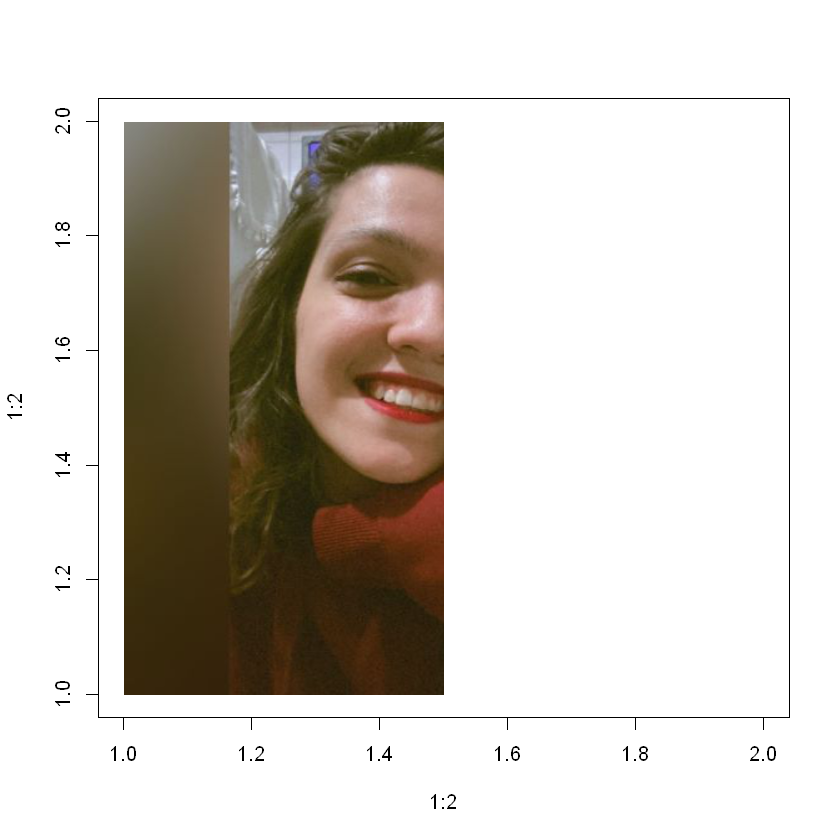

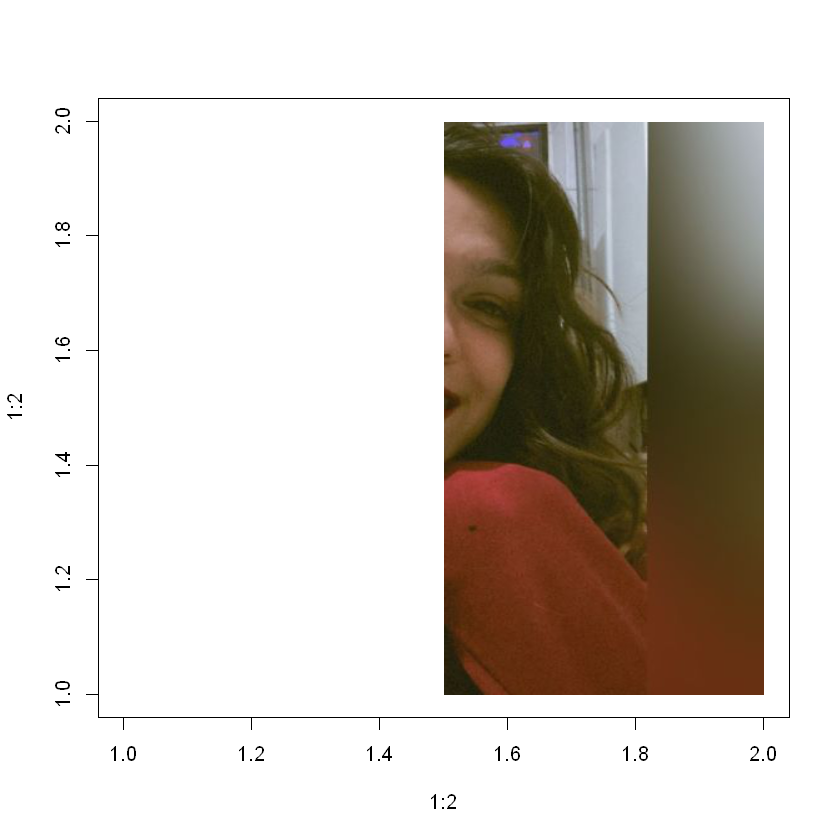

In [12]:
#Divide image
img_left <- img[,1:256,]
img_right <- img[,257:512,]

#display
if(exists("rasterImage")){
      plot(1:2, 1:2,type='n')
      rasterImage(img_left,1,1,1.5,2)
}
if(exists("rasterImage")){
      plot(1:2, 1:2,type='n')
      rasterImage(img_right,1.5,1,2,2)
}

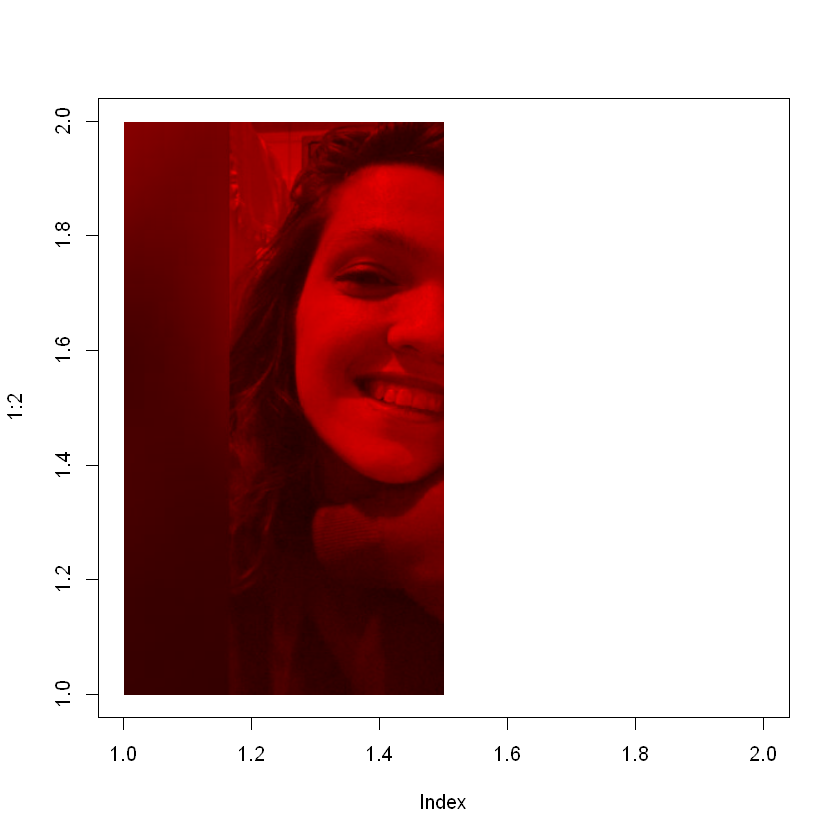

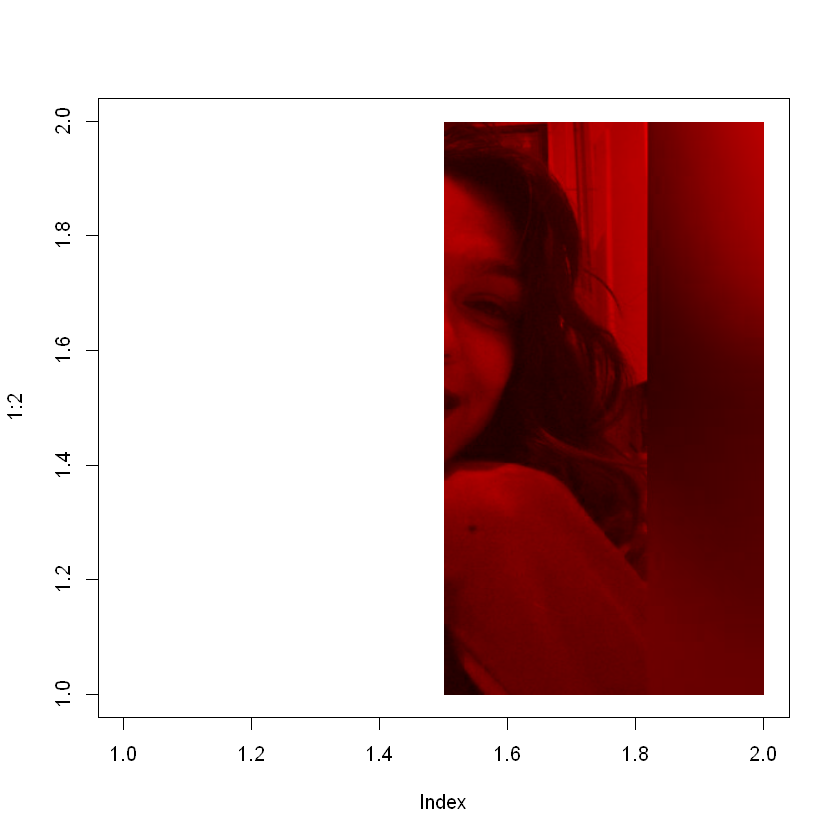

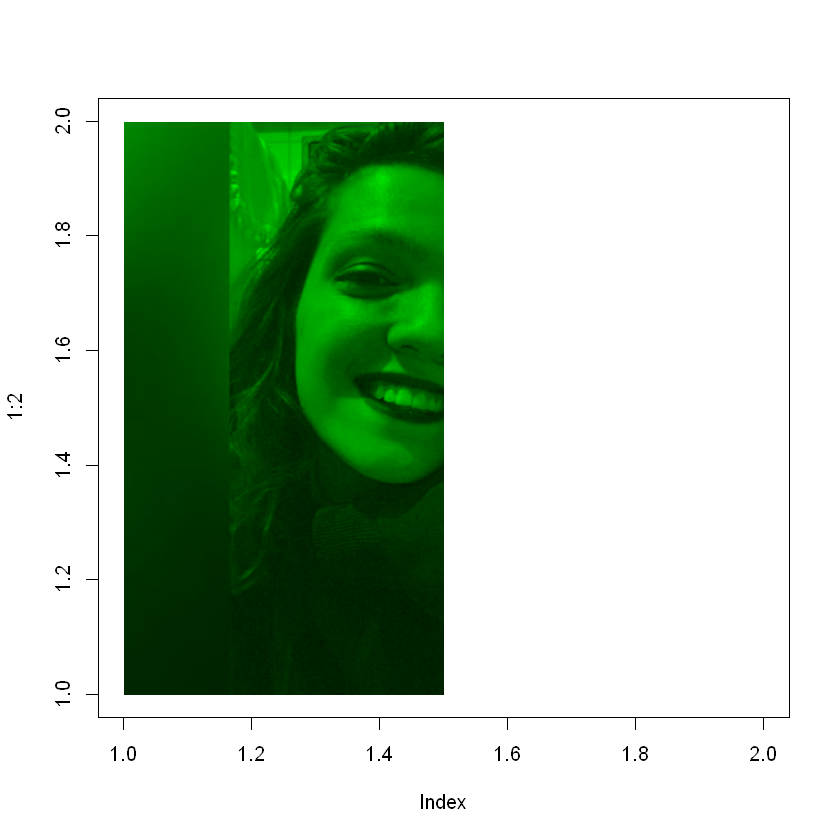

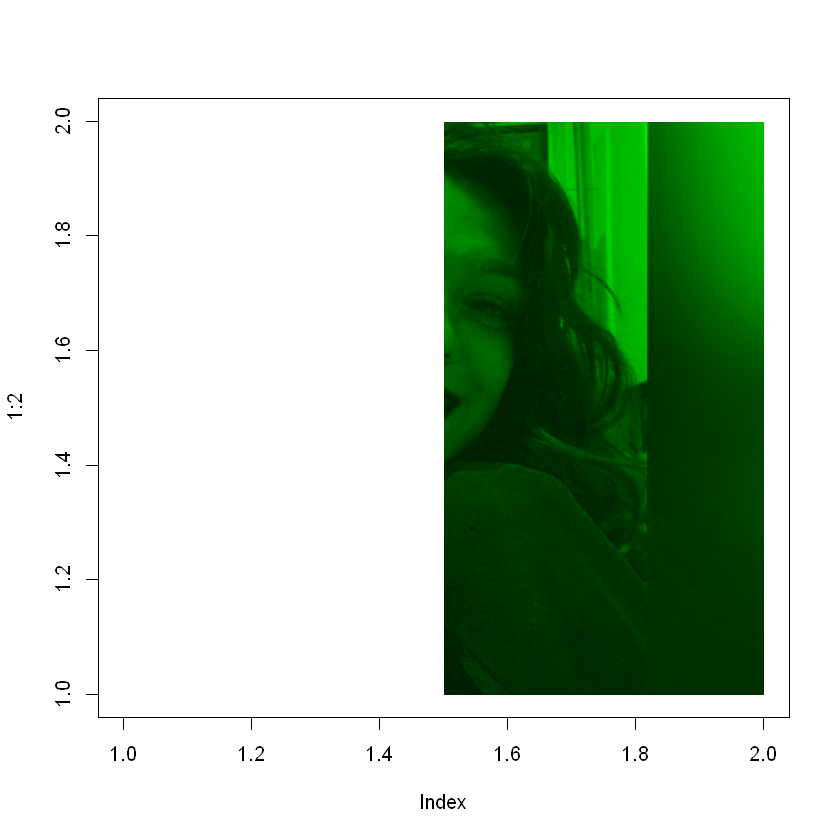

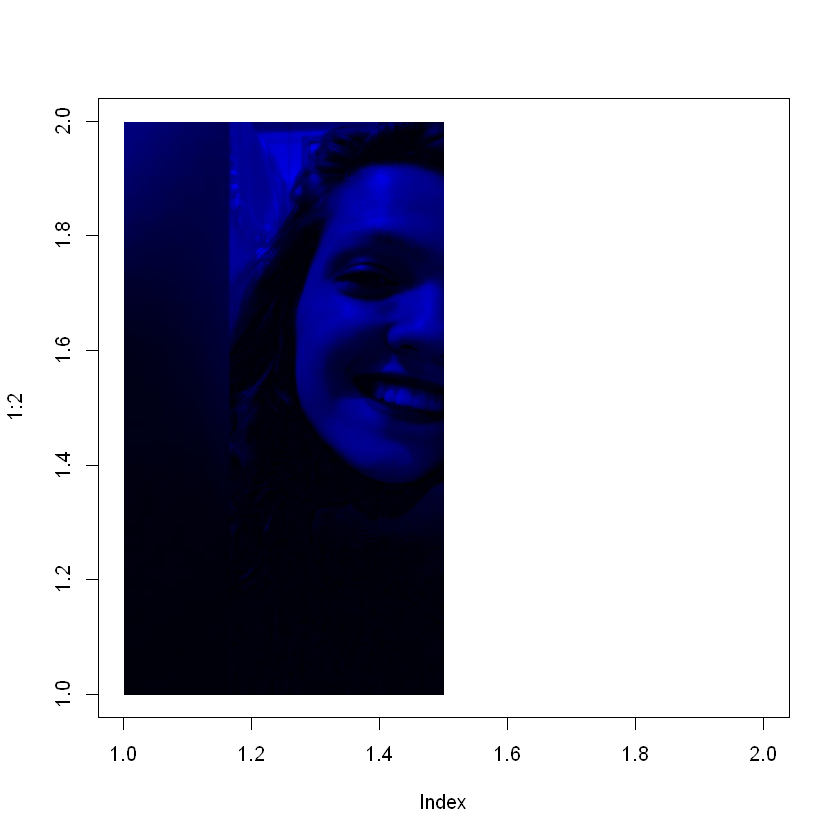

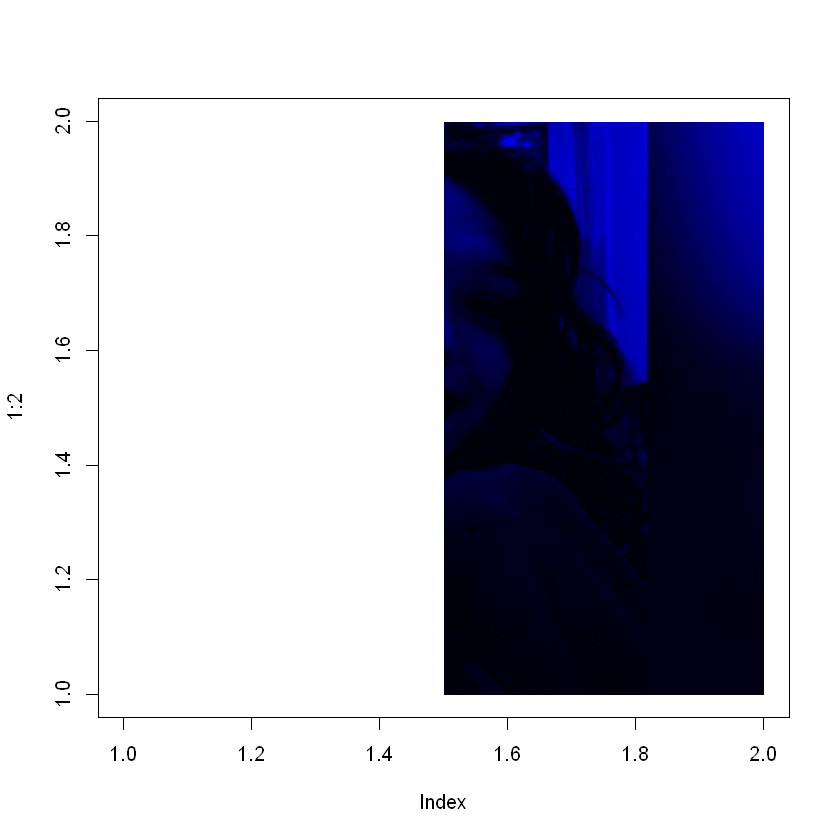

In [13]:
#display rgb channels for divided image
#red
red_left <- img_left
red_right <- img_right

for(i in 1:512){
    for (j in 1:256){
        red_left[i,j,2] = 0
        red_left[i,j,3] = 0
        red_right[i,j,2] = 0
        red_right[i,j,3] = 0
    }
}

if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(red_left,1,1,1.5,2)
}
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(red_right,1.5,1,2,2)
}
#green
green_left <- img_left
green_right <- img_right

for(i in 1:512){
    for (j in 1:256){
        green_left[i,j,1] = 0
        green_left[i,j,3] = 0
        green_right[i,j,1] = 0
        green_right[i,j,3] = 0
    }
}

if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(green_left,1,1,1.5,2)
}
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(green_right,1.5,1,2,2)
}
#blue
blue_left <- img_left
blue_right <- img_right

for(i in 1:512){
    for (j in 1:256){
        blue_left[i,j,1] = 0
        blue_left[i,j,2] = 0
        blue_right[i,j,1] = 0
        blue_right[i,j,2] = 0
    }
}

if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(blue_left,1,1,1.5,2)
}
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(blue_right,1.5,1,2,2)
}


d) Creating noise image and display its channels

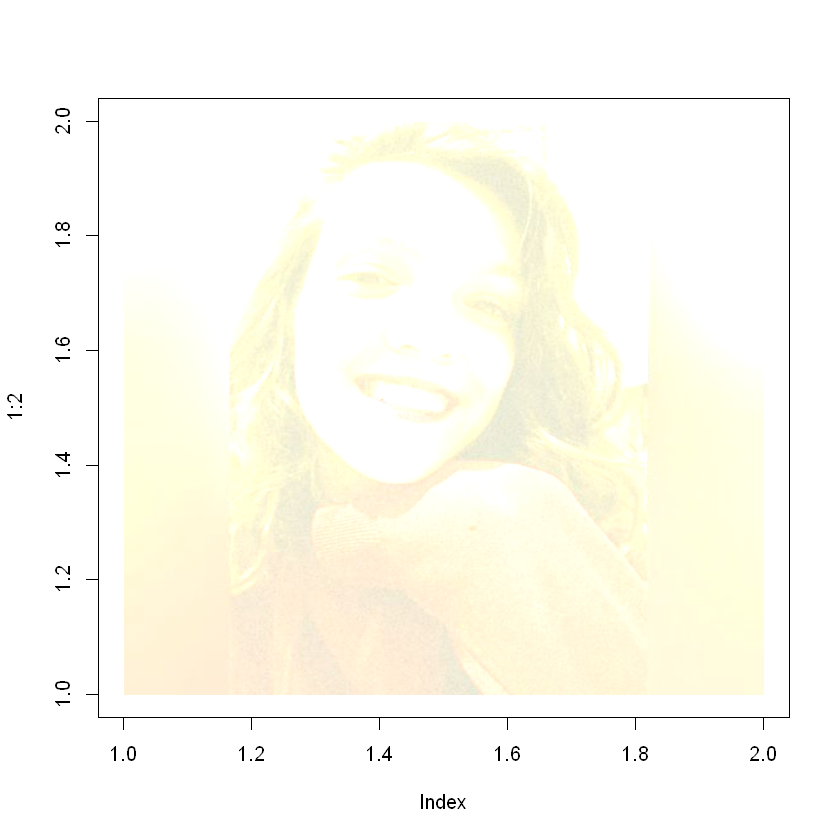

In [14]:
#creating noise image matrix and channels
noise = runif(1,0,max(img))
img_noise = img + noise
red_noise = red + noise
green_noise = green + noise
blue_noise = blue + noise
img_noise[img_noise>1] = 1
red_noise[red_noise>1] = 1
green_noise[green_noise>1] = 1
blue_noise[blue_noise>1] = 1

#display image
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(img_noise,1,1,2,2)
}

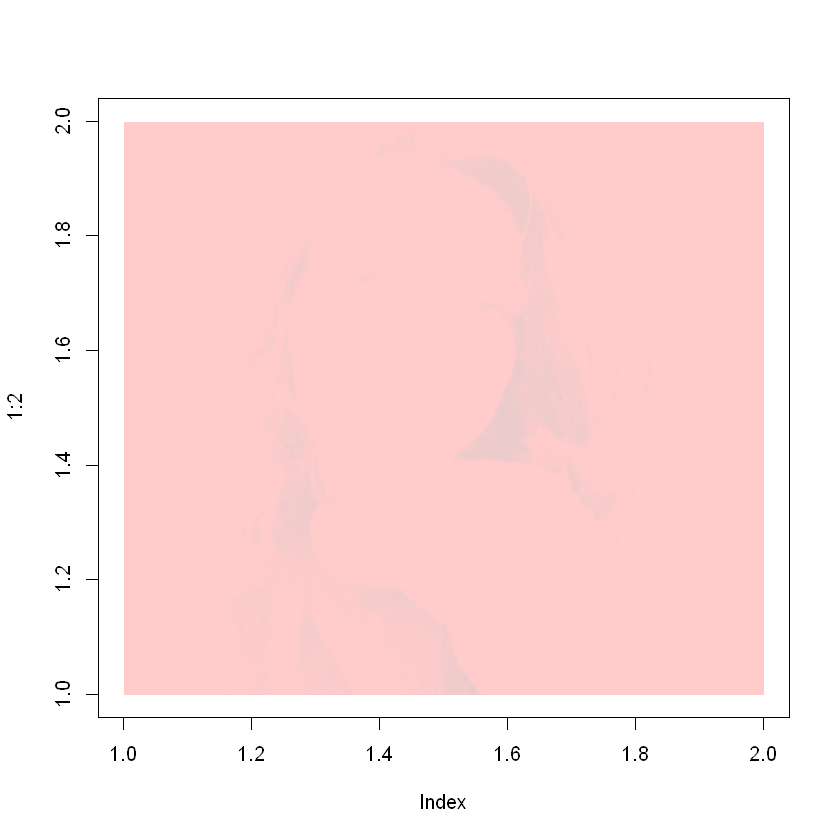

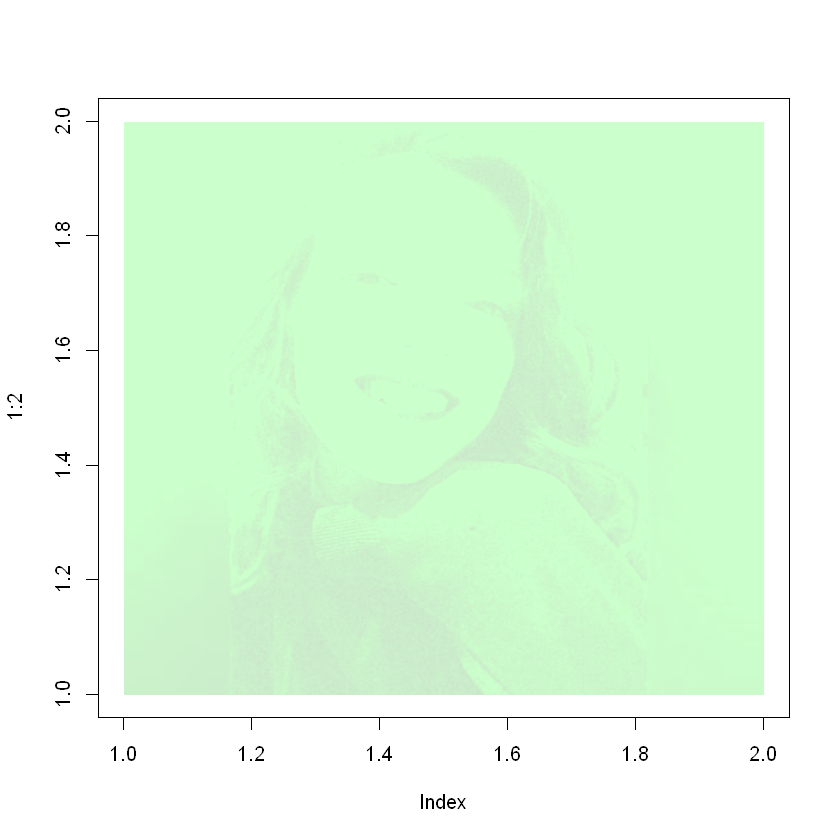

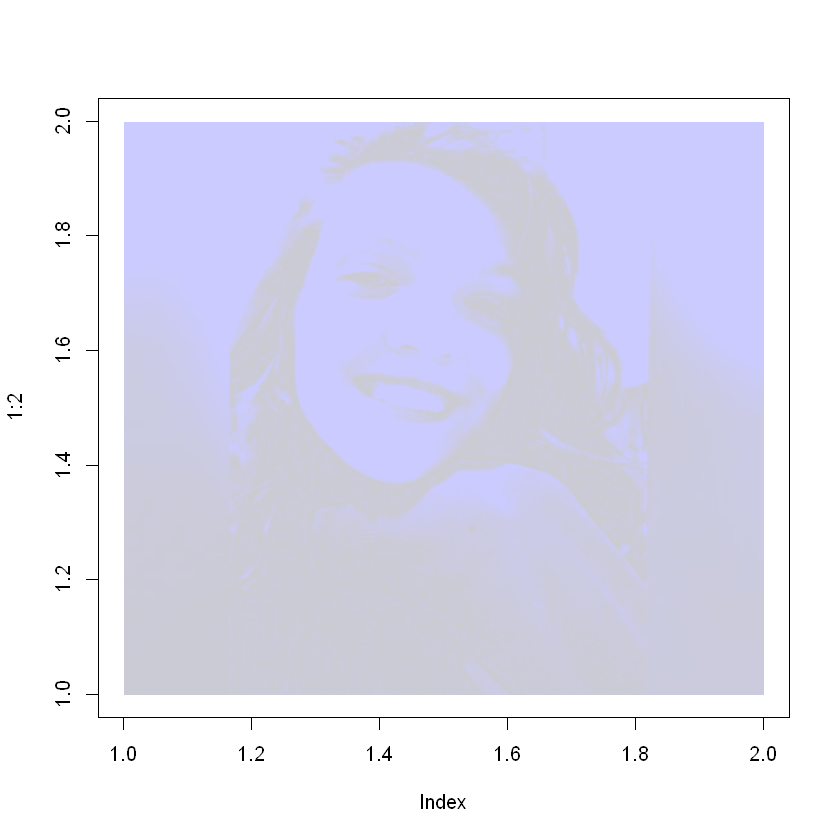

In [15]:
#display rgb channels for noise image
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(red_noise,1,1,2,2)
}
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(green_noise,1,1,2,2)
}
if(exists("rasterImage")){
      plot(1:2,type='n')
      rasterImage(blue_noise,1,1,2,2)
}